# This notebook derives from the excellent (EXCELLENT!) tutorial by Andrej Karpathy

Make sure you have read and understand the material on derivatives, partial derivatives and chain rule before working on this<Br> 

<a href="https://www.youtube.com/watch?v=VMj-3S1tku0&list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ&ab_channel=AndrejKarpathy">Micrograd Video</a><br>
<a href="https://github.com/karpathy/micrograd">Micrograd github repo</a>

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# What is a derivitive?

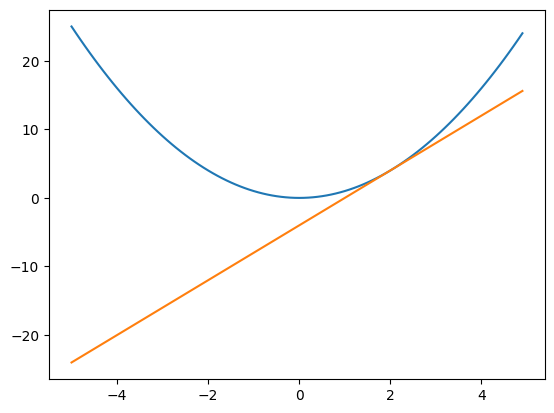

In [27]:
def f(x):
    return x**2

x=np.arange(-5, 5, 0.1)
y=f(x)
plt.plot(x, y)
#derivitave slope=> 2x it varies according to x.  
# so at x=2, slope = 2*2 = 4,  equation of line at  is y=4*x +b
# solve for b with x,y=(2,4)
# y=4x+b
# 4=4*2+b
# b=-4
plt.plot(x, 4*x+-4, label='derivitive');

### Its really rise over run for a function at a particular point

![](./der_formula.png)

In [3]:
#derivative at x=3 for y=x**2
h = .00001

print(f'Derivative for y=x**2 at x=3 is {((3 + h)**2 - 3**2 )/ h}')
print(f'which agrees with dy/dx=2x evaluated at x=3 ={3*2}')



Derivative for y=x**2 at x=3 is 6.000009999951316
which agrees with dy/dx=2x evaluated at x=3 =6


# Partial Derivatives

Just hold all other variables constant while evaluating the variable of interest<br>
<mark>The derivative of a constant is 0 so it has no effect

In [4]:
def showpartial():
    h=.0000000001
    a=2
    b=3
    c=4
    d=a*b +c

    # d1=((a+h)*b) + c      #dd/da=3
    # d1=(a*(b+h)) +c       #dd/db=2
    d1=(a*b) +(c+h)       #dd/dc=1
    print(f'The derivative is {(d1-d)/h}')

showpartial()

#

The derivative is 1.000000082740371


# Backpropagation using Chainrule

You can walk these derivatives all the way back from the output to the variable of interest by multiplying (chaining) them together<br>
This tells you what effect a change in that variable will have on the output<br>

Each neuron in a neural net is typically represented like this<br>
![](./simple_neuron.png)

<br>
<mark>But really its<br>   <strong>out= x1*w1 +x2*w2

### Lets put some numbers to the inputs

In [28]:
#for these numbers
h=.00001    #the bit we add to see the change in output for numerical gradient
x1=2
x2=3
w1=4
w2=5
x2w2=x2*w2  
x1w1=x1*w1
out=x1w1 +x2w2



With neural nets you use backprop to adjust parameters to get the desired output.<br>
<mark>The parameters that you adjust are usually the weights (w1,w2) and biases(later), the inputs are fixed (x1,x2) so you cannot change them<br>
Start at the end and go backward, using the chain rule to accumulate gradients (or derivatives)

So if x1,x2,w1,w2 have the values on the left<br>
The calculation flows through the neuron to give the output shown<br>

![](./neuron_numbers.png)



In [29]:
#for the out node whats the gradient? dout/dout
#its asking how a function changes relative to itself
#dout/dout = 1

out1=out+h #add a small bit to see how much the output changes
gradout=(out1-out)/h
print(f'The local numerical gradient for out is {gradout}')

The local numerical gradient for out is 0.9999999999621422


In [30]:
#what about for x2w2 (dout/dx2w2?
x2w2_1=(x2w2+h)     
gradx2w2=(x2w2_1 - x2w2)/h
print(f'The local numerical gradient for x2w2 is {gradx2w2}')

#x1*w1 is held constant since we want to find the gradient with respect to x2w2
#so dout/dx2w2 = d(x2*w2 +constant)/dx2w2=d(x2*w2)/dx2w2=1

print(f'The backproped numerical gradient gradx2w2*gradout= {gradx2w2*gradout}')

#dout/dx2dw2=dout/dout *dout/dx2dw2 = 1*1=1

The local numerical gradient for x2w2 is 0.9999999999621422
The backproped numerical gradient gradx2w2*gradout= 0.9999999999242843


In [31]:
#ok now what about w2 (dx2w2/dw2)
w2_1=(w2+h)

gradx2w2_w2=(x2*w2_1 - x2w2)/h
print(f'The local numerical gradient for dx2w2/dw2 is {gradx2w2_w2}')
print(f'The backproped numerical gradient gradx2w2*gradout= {gradx2w2_w2*gradx2w2*gradout}')

#or dx2w2/dw2=((x2*(w2+h))-(x2*w2))/h=(x2*h)/h=x2

#dout/dw2=dout/dout *dout/dx2dw2 *dx2w2/dw2=1*1*x2=x2=3

#says w2 has a positive effect on out, add a little it goes up

The local numerical gradient for dx2w2/dw2 is 2.9999999998864264
The backproped numerical gradient gradx2w2*gradout= 2.999999999659279


## Here is the graph will all the gradients added

![](./neuron_with_grads_values.png)


### <mark>What the gradients tell us, is what effect on the output a change in the input will have.  The bigger the gradient, the bigger the change

In [26]:
def f():
    #for these numbers
    h=.00001    #the bit we add to see the change in output
    x1=2
    x2=3
    w1=4
    w2=5  
    x2w2=x2*w2  
    x1w1=x1*w1
    out=x1w1 +x2w2

    #show gradient increases
    w1=w1+.1*(2)
    x1w1=x1*w1

    #show gradient increases
    # w2=w2+.1*(3)
    # x2w2=x2*w2

    out1=x1w1 +x2w2
    print(f'out goes from {out} to {out1}')
f()

out goes from 23 to 23.4


# Add in the error function

<mark>If the output is an error function that you want to drive to 0, then move the variable of interest in the negative direction of the gradient chain to lower the output

### So given this Error Function<br>

Error=1/2(out-correct)**2


### If you pipe the neuron into the error(loss) function, and calculate the gradients the graph looks like this


![](./complete_with_grad.png)



##  <mark>So now we know how to do derivatives, partial derivatives, and backpropagate these through a graph by hand. We also know how to pipe the output into an error function, and we want that error to be 0 (so the network produces the correct output). And finally we can use the backpropagated derivatives to change the values of the weights to make the error function go to 0

<mark>This is both the forward and backward pass for a neural network, but we dont want to do it by hand, we want to automate it. Lets build a class for that